<a href="https://colab.research.google.com/github/Chrismond-Versailles/Abortion-Case-in-Haiti-Capstone-project/blob/main/Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class ReadStataFile:
    def __init__(self,folder_name):
        self.folder_name= folder_name
        self.__load_columns__()

    def __load_columns__(self):
      
        file_name =self.folder_name[0:-2]+"FL"
        obj = open(f"./{self.folder_name}/{file_name}.DO")
        lines = obj.readlines()
        labels = {}
        for line in lines[2:]:
            if line != "#delimit ;" and len(line.strip()) >0 :
                my_split = line.split('\"')
                my_var = my_split[0].replace("label variable","").strip()
                my_label = my_split[1].strip()
                labels[my_var]=my_label
            
            else:
                break;
        self.variables = labels.keys()
        self.labels = labels.values()
        self.col_dict =labels
        obj.close()
    
    def get_col_modality(self,variable_name):
        # #delimit cr
      
        folder_name = "HTBR71DT"
        file_name =self.folder_name[0:-2]+"FL"
        obj = open(f"./{self.folder_name}/{file_name}.DO")
        lines = obj.readlines()
        flag_delimiter = 0
        flag_variable_found = 0
        labels ={}
        for line in lines[2:]:
            #print(line)
            if line.lower().strip().find("delimit") >0:
                flag_delimiter = 1
                #print("delimiter found !!!")
            elif line.lower().find(variable_name.lower()) >0 and flag_delimiter == 1:
                flag_variable_found = 1
                #print("variable found !!!")
            elif flag_variable_found == 1 and flag_delimiter == 1 and  line.lower().find(variable_name.lower()) ==-1 and len(line.strip()) >0 and line.strip() != ";" and  len(line.split('\"')) >1   :
                my_split = line.split('\"')    
                my_var_string = my_split[0].strip()
                if self.is_number(my_var_string):
                    my_var = float(my_var_string)
                else:
                    my_var = my_var_string
                my_label = my_split[1].strip()
                labels[my_var]=my_label
                
            
            elif flag_variable_found == 1 and flag_delimiter == 1 and line.strip() == ";" :
                #print("variable not found !!!")
                break;
        obj.close()
        return labels 

    def get_col_label(self,variable_name):
        return self.col_dict.get(variable_name.lower())

    def to_dataframe(self,use_modality=False,columns=None):
        import pandas as pd
        file_name =self.folder_name[0:-2]+"FL"
        df = pd.read_stata(f"./{self.folder_name}/{file_name}.DTA",convert_categoricals=False)
        if columns:
            df=df[columns]
        if  use_modality and not columns:
            for col in self.variables:
                my_dict = self.get_col_modality(col)
                df[col].replace(my_dict,inplace=True)
            
        elif use_modality and  columns :
            for col in columns:
                my_dict = self.get_col_modality(col)
                df[col].replace(my_dict,inplace=True)
        df.rename(columns=self.col_dict,inplace=True)

      

        return df

    def is_number(self,string):
        try:
            float(string)
            return True
        except ValueError:
            return False
    def get_key(self,my_label):
        for key,label in self.col_dict.items():
            if label == my_label:
                return key
        return None

    

In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')
#r'C:\Users\bootcamp\Desktop\Weds\final_data.csv'

In [ ]:
# data processing librairies
import pandas as pd
import numpy as np
# statistics and test 
from scipy import stats
from scipy.stats import chi2_contingency
#data visualization
import matplotlib.pyplot as plot
import seaborn as sns
# data modeling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import precision_recall_fscore_support, classification_report,precision_score,auc,accuracy_score, confusion_matrix, mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import  AdaBoostClassifier,GradientBoostingRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reprod = ReadStataFile("/content/drive/MyDrive/versailles/HTIR71DT/HTIR71FL.DCT")

In [ ]:
#cols = pd.read_excel("gcp.xlsx", header = None)
#selected = cols[0].to_list()

In [ ]:
#df1 = reprod.to_dataframe(columns=selected, use_modality = True)
df1 = pd.read_csv("/content/drive/MyDrive/versailles/versailles_data.csv")

In [ ]:
df1.shape

(15513, 48)

In [ ]:
###df1.to_csv (r'C:\Users\bootcamp\Documents\versaillesversaille_data.csv', index = False, header=True)

In [ ]:
df1.to_csv (r'C:\Users\bootcamp\Documents\versaillesversaille_data.csv', index = False, header=True)

In [ ]:
df1

,Last source for current users,How many pregnancy losses during her live,Pregnancy outcome of termination,How many induced abortions during her live,How many miscarriages during her live,How many children were born dead during her live,Did decide herself on abortion or was forced by someone,Who forced her to do the abortion,What was used to end the pregnancy - dilatation and curettage,What was used to end the pregnancy - aspiration,What was used to end the pregnancy - sonde,What was used to end the pregnancy - Cytotek (Misoprostol),What was used to end the pregnancy - injections,What was used to end the pregnancy - comprimï¿½s,What was used to end the pregnancy - plants/ dï¿½coction,What was used to end the pregnancy - other,What was used to end the pregnancy - don't know,Where did the abortion take place,Who assisted during this abortion - doctor,Who assisted during this abortion - nurse,Who assisted during this abortion - auxiliary,Who assisted during this abortion - health agent,Who assisted during this abortion - birth attendant/ matrone avec boï¿½te,Who assisted during this abortion - traditional birth attendant/ matrone sans bo,Who assisted during this abortion - guï¿½risseur/mï¿½decin-feuille,Who assisted during this abortion - Ougan/mambo,Who assisted during this abortion - relatives/ friends,Who assisted during this abortion - other,Who assisted during this abortion - nobody,Did suffer complication from this abortion,Would consider another abortion with unwanted pregnancy,"Tried to abort more pregnancies, but failed",How many such tentative abortions failed,Pregnancy duration,Pregnancy duration 1,Pregnancy duration 2,Pregnancy duration 3,Pregnancy duration 4,Pregnancy duration 5,Age in 5-year groups,Number of living children,Highest educational level,Region,Type of place of residence,Religion,Husband/partner's education level,Respondent's occupation,Current marital status
0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,15-19,0.0,Secondary,Sud,Rural,Protestant,NaN,Not working and didn't work in last 12 months,Never in union
1,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,25-29,0.0,Secondary,Sud,Rural,Catholic,NaN,Commercant et assimilï¿½,Never in union
2,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,15-19,0.0,Primary,Sud,Rural,Catholic,NaN,Not working and didn't work in last 12 months,Never in union
3,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,30-34,1.0,Secondary,Sud,Rural,Protestant,Higher,Insituteur et assimilï¿½s,Married
4,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,25-29,0.0,Secondary,Sud,Rural,Protestant,Higher,Insituteur et assimilï¿½s,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50+,NaN,Primary,Aire Metropolitaine,Urban,Protestant,NaN,NaN,NaN
15509,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,25-29,0.0,Higher,Aire Metropolitaine,Urban,Protestant,NaN,Not working and didn't work in last 12 months,Never in union
15510,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,30-34,0.0,Higher,Aire Metropolitaine,Urban,Protestant,NaN,Employï¿½ administratif du secteur privï¿½,

In [ ]:
df1.columns

Index(['Last source for current users',
       'How many pregnancy losses during her live',
       'Pregnancy outcome of termination',
       'How many induced abortions during her live',
       'How many miscarriages during her live',
       'How many children were born dead during her live',
       'Did decide herself on abortion or was forced by someone',
       'Who forced her to do the abortion',
       'What was used to end the pregnancy - dilatation and curettage',
       'What was used to end the pregnancy - aspiration',
       'What was used to end the pregnancy - sonde',
       'What was used to end the pregnancy - Cytotek (Misoprostol)',
       'What was used to end the pregnancy - injections',
       'What was used to end the pregnancy - comprimï¿½s',
       'What was used to end the pregnancy - plants/ dï¿½coction',
       'What was used to end the pregnancy - other',
       'What was used to end the pregnancy - don't know',
       'Where did the abortion take place',
    

In [ ]:
df1.loc[~(df1['How many induced abortions during her live'].isna()),['How many induced abortions during her live','How many miscarriages during her live']]

,How many induced abortions during her live,How many miscarriages during her live
10,1.0,0.0
13,0.0,1.0
17,0.0,1.0
27,1.0,0.0
30,1.0,0.0
...,...,...
15436,0.0,0.0
15450,0.0,1.0
15460,0.0,0.0
15499,0.0,1.0


In [ ]:
df1['How many miscarriages during her live'].unique()

array([nan,  0.,  1.,  2.,  5.,  3.,  4.,  8.,  6.])

In [ ]:
df1['How many induced abortions during her live'].fillna(0,inplace=True)
#df1['How many miscarriages during her live'].fillna(0,inplace=True)

In [ ]:
df1[['How many induced abortions during her live','How many miscarriages during her live']].isna().sum()

How many induced abortions during her live        0
How many miscarriages during her live         13760
dtype: int64

In [ ]:
df1['target'] = 'No Abortion'
df1.loc[(df1['How many induced abortions during her live']!=0) ,'target'] = 'Abortion'

In [ ]:
df1['target'].value_counts(normalize=False)

No Abortion    15033
Abortion         480
Name: target, dtype: int64

df1['Number of living children']=churn['ToNumber of living childrentalCharges'].replace({'NaN': 0})
df1['Number of living children']=churn['ToNumber of living childrentalCharges'].astype('float')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15513 entries, 0 to 15512
Data columns (total 49 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Last source for current users                                                     3151 non-null   object 
 1   How many pregnancy losses during her live                                         14371 non-null  object 
 2   Pregnancy outcome of termination                                                  1013 non-null   object 
 3   How many induced abortions during her live                                        15513 non-null  float64
 4   How many miscarriages during her live                                             1753 non-null   float64
 5   How many children were born dead during her live                                  1753 non-null   float64
 6 

In [ ]:
df1= df1.drop('Last source for current users', axis=1)

In [ ]:
df1.isnull()

,How many pregnancy losses during her live,Pregnancy outcome of termination,How many induced abortions during her live,How many miscarriages during her live,How many children were born dead during her live,Did decide herself on abortion or was forced by someone,Who forced her to do the abortion,What was used to end the pregnancy - dilatation and curettage,What was used to end the pregnancy - aspiration,What was used to end the pregnancy - sonde,What was used to end the pregnancy - Cytotek (Misoprostol),What was used to end the pregnancy - injections,What was used to end the pregnancy - comprimï¿½s,What was used to end the pregnancy - plants/ dï¿½coction,What was used to end the pregnancy - other,What was used to end the pregnancy - don't know,Where did the abortion take place,Who assisted during this abortion - doctor,Who assisted during this abortion - nurse,Who assisted during this abortion - auxiliary,Who assisted during this abortion - health agent,Who assisted during this abortion - birth attendant/ matrone avec boï¿½te,Who assisted during this abortion - traditional birth attendant/ matrone sans bo,Who assisted during this abortion - guï¿½risseur/mï¿½decin-feuille,Who assisted during this abortion - Ougan/mambo,Who assisted during this abortion - relatives/ friends,Who assisted during this abortion - other,Who assisted during this abortion - nobody,Did suffer complication from this abortion,Would consider another abortion with unwanted pregnancy,"Tried to abort more pregnancies, but failed",How many such tentative abortions failed,Pregnancy duration,Pregnancy duration 1,Pregnancy duration 2,Pregnancy duration 3,Pregnancy duration 4,Pregnancy duration 5,Age in 5-year groups,Number of living children,Highest educational level,Region,Type of place of residence,Religion,Husband/partner's education level,Respondent's occupation,Current marital status,target
0,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False
1,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False
2,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False
3,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
4,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,True,True,True,False
15509,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False
15510,Fals

In [ ]:
#df1['How many pregnancy losses during her live'].unique
df1['How many pregnancy losses during her live'].nunique


<bound method IndexOpsMixin.nunique of 0        None
1        None
2        None
3        None
4        None
         ... 
15508     NaN
15509    None
15510    None
15511    None
15512    None
Name: How many pregnancy losses during her live, Length: 15513, dtype: object>

In [ ]:
df1['Number of living children']= df1['Number of living children'].apply(lambda x : str(x).replace("nan" ,"0"))


In [ ]:
df1['Number of living children']=df1['Number of living children'].astype(float)

In [ ]:
df1['Number of living children'].dtypes

dtype('float64')

In [ ]:
#df1['Pregnancy duration'].nunique()

In [ ]:
df1.head()

,How many pregnancy losses during her live,Pregnancy outcome of termination,How many induced abortions during her live,How many miscarriages during her live,How many children were born dead during her live,Did decide herself on abortion or was forced by someone,Who forced her to do the abortion,What was used to end the pregnancy - dilatation and curettage,What was used to end the pregnancy - aspiration,What was used to end the pregnancy - sonde,What was used to end the pregnancy - Cytotek (Misoprostol),What was used to end the pregnancy - injections,What was used to end the pregnancy - comprimï¿½s,What was used to end the pregnancy - plants/ dï¿½coction,What was used to end the pregnancy - other,What was used to end the pregnancy - don't know,Where did the abortion take place,Who assisted during this abortion - doctor,Who assisted during this abortion - nurse,Who assisted during this abortion - auxiliary,Who assisted during this abortion - health agent,Who assisted during this abortion - birth attendant/ matrone avec boï¿½te,Who assisted during this abortion - traditional birth attendant/ matrone sans bo,Who assisted during this abortion - guï¿½risseur/mï¿½decin-feuille,Who assisted during this abortion - Ougan/mambo,Who assisted during this abortion - relatives/ friends,Who assisted during this abortion - other,Who assisted during this abortion - nobody,Did suffer complication from this abortion,Would consider another abortion with unwanted pregnancy,"Tried to abort more pregnancies, but failed",How many such tentative abortions failed,Pregnancy duration,Pregnancy duration 1,Pregnancy duration 2,Pregnancy duration 3,Pregnancy duration 4,Pregnancy duration 5,Age in 5-year groups,Number of living children,Highest educational level,Region,Type of place of residence,Religion,Husband/partner's education level,Respondent's occupation,Current marital status,target
0,None,NaN,0.0,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,15-19,0.0,Secondary,Sud,Rural,Protestant,NaN,Not working and didn't work in last 12 months,Never in union,No Abortion
1,None,NaN,0.0,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,25-29,0.0,Secondary,Sud,Rural,Catholic,NaN,Commercant et assimilï¿½,Never in union,No Abortion
2,None,NaN,0.0,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,15-19,0.0,Primary,Sud,Rural,Catholic,NaN,Not working and didn't work in last 12 months,Never in union,No Abortion
3,None,NaN,0.0,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,30-34,1.0,Secondary,Sud,Rural,Protestant,Higher,Insituteur et assimilï¿½s,Married,No Abortion
4,None,NaN,0.0,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,25-29,0.0,Secondary,Sud,Rural,Protestant,Higher,Insituteur et assimilï¿½s,Married,No Abortion


In [ ]:
df1.values

array([['None', nan, 0.0, ...,
        "Not working and didn't work in last 12 months",
        'Never in union', 'No Abortion'],
       ['None', nan, 0.0, ..., 'Commercant et assimilï¿½',
        'Never in union', 'No Abortion'],
       ['None', nan, 0.0, ...,
        "Not working and didn't work in last 12 months",
        'Never in union', 'No Abortion'],
       ...,
       ['None', nan, 0.0, ...,
        'Employï¿½ administratif du secteur privï¿½', 'Never in union',
        'No Abortion'],
       ['None', nan, 0.0, ..., 'Commercant et assimilï¿½',
        'Never in union', 'No Abortion'],
       ['None', nan, 0.0, ...,
        'Personnel des services directs au particulier',
        'Never in union', 'No Abortion']], dtype=object)

In [ ]:
#cols = ['Pregnancy duration 5']
#df1.drop(cols, axis=1, inplace=True)

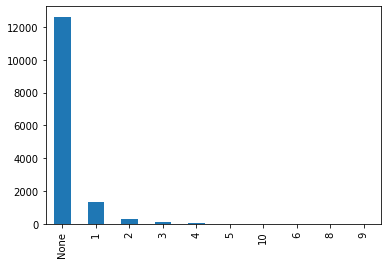

In [ ]:
df1["How many pregnancy losses during her live"].value_counts().plot.bar()

In [ ]:
df1['How many pregnancy losses during her live'] = df1['How many pregnancy losses during her live'].apply(lambda x : str(x).replace("None" ,"0"))
df1['How many pregnancy losses during her live'] = df1['How many pregnancy losses during her live'].astype(float)

In [ ]:
df1["How many pregnancy losses during her live"].value_counts()

0.0     12618
1.0      1356
2.0       275
3.0        85
4.0        24
5.0         6
8.0         2
6.0         2
10.0        2
9.0         1
Name: How many pregnancy losses during her live, dtype: int64

In [ ]:
df1["Respondent's occupation"].unique()

array(["Not working and didn't work in last 12 months",
       'Commercant et assimilï¿½', 'Insituteur et assimilï¿½s', nan,
       'Personnel des services directs au particulier',
       "Profession de l'information des arts et spectacles",
       'Technicien (sauf technicien du tertiaire)',
       'Employï¿½ du commerce', 'Ouvrier qualifiï¿½ de type industriel',
       'Profession intermediare de la sante et du travail social',
       'Agriculteur', 'Ouvrier qualifiï¿½ de type artisanal',
       'Professeur, Profession Scientifque',
       'Employï¿½ administratif du secteur privï¿½',
       'Cadre de la fonction publique', 'Artisan',
       'Policier ou militaire',
       "Cadres adminsitratifs ou commercial d'entreperise",
       'Profession intermediare/administrative du privï¿½',
       "Chef d'entreprise", 'Other', 'Profession libï¿½rale',
       'Clerge, regligieux', 'Chaffeur',
       'Contremaitre, agent de maitrise',
       'Employï¿½ ou agent de service du secteur public',


In [ ]:
df1['Region'].unique()

array(['Sud', 'Aire Metropolitaine', 'Artibonite', "Grand'Anse", 'Nippes',
       'Nord', 'Rest-Ouest', 'Nord-Ouest', 'Centre', 'Nord-Est',
       'Sud-Est'], dtype=object)

In [ ]:
df1['Region'] = df1['Region'].apply(lambda x : str(x).replace("Aire Metropolitaine" ,"Ouest"))
df1['Region'] = df1['Region'].apply(lambda x : str(x).replace("Rest-Ouest" ,"Ouest"))

In [ ]:
df1['Region'].unique()

array(['Sud', 'Ouest', 'Artibonite', "Grand'Anse", 'Nippes', 'Nord',
       'Nord-Ouest', 'Centre', 'Nord-Est', 'Sud-Est'], dtype=object)

In [ ]:
df1["Respondent's occupation"] = np.where(df1["Respondent's occupation"] == "Not working and didn't work in last 12 months","Not working", 'working')
 

In [ ]:
df1['How many such tentative abortions failed'].unique()

array(['None', nan, '2', '1', '9', '3', '5', '4', '8', '7'], dtype=object)

In [ ]:
df1['How many such tentative abortions failed'] = df1['How many such tentative abortions failed'].apply(lambda x : str(x).replace("None" ,"0"))
df1['How many such tentative abortions failed'] = df1['How many such tentative abortions failed'].astype(float)

In [ ]:
df1["Respondent's occupation"].value_counts()

working        9151
Not working    6362
Name: Respondent's occupation, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15513 entries, 0 to 15512
Data columns (total 48 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   How many pregnancy losses during her live                                         14371 non-null  float64
 1   Pregnancy outcome of termination                                                  1013 non-null   object 
 2   How many induced abortions during her live                                        15513 non-null  float64
 3   How many miscarriages during her live                                             1753 non-null   float64
 4   How many children were born dead during her live                                  1753 non-null   float64
 5   Did decide herself on abortion or was forced by someone                           259 non-null    object 
 6 

In [ ]:
df1['Current marital status'].unique()

array(['Never in union', 'Married', 'Living with partner', nan,
       'No longer living together/separated', 'Widowed', 'Divorced'],
      dtype=object)

In [ ]:
df1["How many induced abortions during her live"].unique()


array([ 0.,  1.,  2.,  4.,  3.,  5., 10.])

In [ ]:
#df1["How many induced abortions during her live"].

In [ ]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
percent_missing

How many pregnancy losses during her live                                             7.361568
Pregnancy outcome of termination                                                     93.469993
How many induced abortions during her live                                            0.000000
How many miscarriages during her live                                                88.699800
How many children were born dead during her live                                     88.699800
Did decide herself on abortion or was forced by someone                              98.330433
Who forced her to do the abortion                                                    99.580997
What was used to end the pregnancy - dilatation and curettage                         7.361568
What was used to end the pregnancy - aspiration                                       7.361568
What was used to end the pregnancy - sonde                                            7.361568
What was used to end the pregnancy - Cytotek (Miso

In [ ]:
missing_value_df = pd.DataFrame({'column_name': df1.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
target,target,0.000000
Respondent's occupation,Respondent's occupation,0.000000
How many induced abortions during her live,How many induced abortions during her live,0.000000
Religion,Religion,0.000000
Type of place of residence,Type of place of residence,0.000000
Region,Region,0.000000
Highest educational level,Highest educational level,0.000000
Number of living children,Number of living children,0.000000
Age in 5-year groups,Age in 5-year groups,0.000000
Who assisted during this abortion - birth attendant/ matrone avec boï¿½te,Who assisted during this abortion - birth atte...,7.361568


In [ ]:
#df1[df1.columns[df1.isnull().mean() < 0.8]]
limitPer = len(df1) * .80
df1 = df1.dropna(thresh=limitPer,axis=1)



In [ ]:
df1

,How many pregnancy losses during her live,How many induced abortions during her live,What was used to end the pregnancy - dilatation and curettage,What was used to end the pregnancy - aspiration,What was used to end the pregnancy - sonde,What was used to end the pregnancy - Cytotek (Misoprostol),What was used to end the pregnancy - injections,What was used to end the pregnancy - comprimï¿½s,What was used to end the pregnancy - plants/ dï¿½coction,What was used to end the pregnancy - other,What was used to end the pregnancy - don't know,Who assisted during this abortion - doctor,Who assisted during this abortion - nurse,Who assisted during this abortion - auxiliary,Who assisted during this abortion - health agent,Who assisted during this abortion - birth attendant/ matrone avec boï¿½te,Who assisted during this abortion - traditional birth attendant/ matrone sans bo,Who assisted during this abortion - guï¿½risseur/mï¿½decin-feuille,Who assisted during this abortion - Ougan/mambo,Who assisted during this abortion - relatives/ friends,Who assisted during this abortion - other,Who assisted during this abortion - nobody,How many such tentative abortions failed,Age in 5-year groups,Number of living children,Highest educational level,Region,Type of place of residence,Religion,Respondent's occupation,Current marital status,target
0,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,15-19,0.0,Secondary,Sud,Rural,Protestant,Not working,Never in union,No Abortion
1,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,25-29,0.0,Secondary,Sud,Rural,Catholic,working,Never in union,No Abortion
2,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,15-19,0.0,Primary,Sud,Rural,Catholic,Not working,Never in union,No Abortion
3,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,30-34,1.0,Secondary,Sud,Rural,Protestant,working,Married,No Abortion
4,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,25-29,0.0,Secondary,Sud,Rural,Protestant,working,Married,No Abortion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50+,0.0,Primary,Ouest,Urban,Protestant,working,NaN,No Abortion
15509,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,25-29,0.0,Higher,Ouest,Urban,Protestant,Not working,Never in union,No Abortion
15510,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,30-34,0.0,Higher,Ouest,Urban,Protestant,working,Never in union,No Abortion
15511,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,30-34,0.0,Higher,Ouest,Urban,Protestant,working,Never in union,No Abortion


In [ ]:
abortion = df1.dropna(axis = 0)

In [ ]:
abortion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14371 entries, 0 to 15512
Data columns (total 32 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   How many pregnancy losses during her live                                         14371 non-null  float64
 1   How many induced abortions during her live                                        14371 non-null  float64
 2   What was used to end the pregnancy - dilatation and curettage                     14371 non-null  object 
 3   What was used to end the pregnancy - aspiration                                   14371 non-null  object 
 4   What was used to end the pregnancy - sonde                                        14371 non-null  object 
 5   What was used to end the pregnancy - Cytotek (Misoprostol)                        14371 non-null  object 
 6 

In [ ]:
abortion = abortion.rename(columns = {'What was used to end the pregnancy - dilatation and curettage': 'dilatation and curettage', 'What was used to end the pregnancy - aspiration': 'aspiration', 'What was used to end the pregnancy - sonde': 'sonde', 'What was used to end the pregnancy - Cytotek (Misoprostol)': 'Cytotek_(Misoprostol)', 'What was used to end the pregnancy - injections': 'injections', 'What was used to end the pregnancy - comprimï¿½s': 'pill', 'What was used to end the pregnancy - plants/ dï¿½coction': 'plants/decoction', 'What was used to end the pregnancy - other': 'other', "What was used to end the pregnancy - don't know": 'dont_know' }, inplace = False)
abortion


,How many pregnancy losses during her live,How many induced abortions during her live,dilatation and curettage,aspiration,sonde,Cytotek_(Misoprostol),injections,pill,plants/decoction,other,dont_know,Who assisted during this abortion - doctor,Who assisted during this abortion - nurse,Who assisted during this abortion - auxiliary,Who assisted during this abortion - health agent,Who assisted during this abortion - birth attendant/ matrone avec boï¿½te,Who assisted during this abortion - traditional birth attendant/ matrone sans bo,Who assisted during this abortion - guï¿½risseur/mï¿½decin-feuille,Who assisted during this abortion - Ougan/mambo,Who assisted during this abortion - relatives/ friends,Who assisted during this abortion - other,Who assisted during this abortion - nobody,How many such tentative abortions failed,Age in 5-year groups,Number of living children,Highest educational level,Region,Type of place of residence,Religion,Respondent's occupation,Current marital status,target
0,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,15-19,0.0,Secondary,Sud,Rural,Protestant,Not working,Never in union,No Abortion
1,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,25-29,0.0,Secondary,Sud,Rural,Catholic,working,Never in union,No Abortion
2,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,15-19,0.0,Primary,Sud,Rural,Catholic,Not working,Never in union,No Abortion
3,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,30-34,1.0,Secondary,Sud,Rural,Protestant,working,Married,No Abortion
4,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,25-29,0.0,Secondary,Sud,Rural,Protestant,working,Married,No Abortion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15507,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,15-19,0.0,Secondary,Ouest,Urban,Protestant,Not working,Never in union,No Abortion
15509,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,25-29,0.0,Higher,Ouest,Urban,Protestant,Not working,Never in union,No Abortion
15510,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,30-34,0.0,Higher,Ouest,Urban,Protestant,working,Never in union,No Abortion
15511,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,30-34,0.0,Higher,Ouest,Urban,Protestant,working,Never in union,No Abortion


In [ ]:
abortion = abortion.rename(columns = {'Age in 5-year groups': 'Age', ' Number of living children': 'living_children', 'How many such tentative abortions failed': 'abortion_failed', 'How many pregnancy losses during her live': 'pregnancy_loses'}, inplace = False)
abortion


,pregnancy_loses,How many induced abortions during her live,dilatation and curettage,aspiration,sonde,Cytotek_(Misoprostol),injections,pill,plants/decoction,other,dont_know,Who assisted during this abortion - doctor,Who assisted during this abortion - nurse,Who assisted during this abortion - auxiliary,Who assisted during this abortion - health agent,Who assisted during this abortion - birth attendant/ matrone avec boï¿½te,Who assisted during this abortion - traditional birth attendant/ matrone sans bo,Who assisted during this abortion - guï¿½risseur/mï¿½decin-feuille,Who assisted during this abortion - Ougan/mambo,Who assisted during this abortion - relatives/ friends,Who assisted during this abortion - other,Who assisted during this abortion - nobody,abortion_failed,Age,Number of living children,Highest educational level,Region,Type of place of residence,Religion,Respondent's occupation,Current marital status,target
0,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,15-19,0.0,Secondary,Sud,Rural,Protestant,Not working,Never in union,No Abortion
1,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,25-29,0.0,Secondary,Sud,Rural,Catholic,working,Never in union,No Abortion
2,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,15-19,0.0,Primary,Sud,Rural,Catholic,Not working,Never in union,No Abortion
3,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,30-34,1.0,Secondary,Sud,Rural,Protestant,working,Married,No Abortion
4,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,25-29,0.0,Secondary,Sud,Rural,Protestant,working,Married,No Abortion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15507,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,15-19,0.0,Secondary,Ouest,Urban,Protestant,Not working,Never in union,No Abortion
15509,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,25-29,0.0,Higher,Ouest,Urban,Protestant,Not working,Never in union,No Abortion
15510,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,30-34,0.0,Higher,Ouest,Urban,Protestant,working,Never in union,No Abortion
15511,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,30-34,0.0,Higher,Ouest,Urban,Protestant,working,Never in union,No Abortion


In [ ]:
abortion1 = abortion.loc[abortion['How many induced abortions during her live']==1,:]

In [ ]:
abortion1["Respondent's occupation"].unique()

array(['Not working', 'working'], dtype=object)

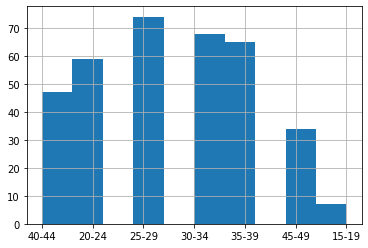

In [ ]:
abortion1["Age"].hist()

In [ ]:
abortion['abortion_failed']=abortion["abortion_failed"].apply(lambda x : str(x).replace("None" ,"0"))
abortion['abortion_failed'] = abortion['abortion_failed'].astype(float)


In [ ]:
abortion["pregnancy_loses"].value_counts(normalize=True).to_frame()

,pregnancy_loses
0.0,0.878018
1.0,0.094357
2.0,0.019136
3.0,0.005915
4.0,0.001670
5.0,0.000418
8.0,0.000139
6.0,0.000139
10.0,0.000139
9.0,0.000070


In [ ]:
abortion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14371 entries, 0 to 15512
Data columns (total 32 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   pregnancy_loses                                                                   14371 non-null  float64
 1   How many induced abortions during her live                                        14371 non-null  float64
 2   dilatation and curettage                                                          14371 non-null  object 
 3   aspiration                                                                        14371 non-null  object 
 4   sonde                                                                             14371 non-null  object 
 5   Cytotek_(Misoprostol)                                                             14371 non-null  object 
 6 

In [ ]:
abortion.head()

,pregnancy_loses,How many induced abortions during her live,dilatation and curettage,aspiration,sonde,Cytotek_(Misoprostol),injections,pill,plants/decoction,other,dont_know,Who assisted during this abortion - doctor,Who assisted during this abortion - nurse,Who assisted during this abortion - auxiliary,Who assisted during this abortion - health agent,Who assisted during this abortion - birth attendant/ matrone avec boï¿½te,Who assisted during this abortion - traditional birth attendant/ matrone sans bo,Who assisted during this abortion - guï¿½risseur/mï¿½decin-feuille,Who assisted during this abortion - Ougan/mambo,Who assisted during this abortion - relatives/ friends,Who assisted during this abortion - other,Who assisted during this abortion - nobody,abortion_failed,Age,Number of living children,Highest educational level,Region,Type of place of residence,Religion,Respondent's occupation,Current marital status,target
0,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,15-19,0.0,Secondary,Sud,Rural,Protestant,Not working,Never in union,No Abortion
1,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,25-29,0.0,Secondary,Sud,Rural,Catholic,working,Never in union,No Abortion
2,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,15-19,0.0,Primary,Sud,Rural,Catholic,Not working,Never in union,No Abortion
3,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,30-34,1.0,Secondary,Sud,Rural,Protestant,working,Married,No Abortion
4,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.0,25-29,0.0,Secondary,Sud,Rural,Protestant,working,Married,No Abortion


# Exploratory Data Analyst. 


In [ ]:
abortion["dilatation and curettage"].value_counts(normalize=True).to_frame()

,dilatation and curettage
No,0.991998
Yes,0.007933
Don't know,0.000070


In [ ]:
abortion1["dilatation and curettage"].value_counts(normalize=True).to_frame()

,dilatation and curettage
No,0.788136
Yes,0.209040
Don't know,0.002825


In [ ]:
abortion1["aspiration"].value_counts(normalize=True).to_frame()

,aspiration
No,0.991525
Yes,0.005650
Don't know,0.002825


In [ ]:
abortion1["aspiration"].value_counts(normalize=True).to_frame()

,aspiration
No,0.991525
Yes,0.005650
Don't know,0.002825


In [ ]:

abortion1["sonde"].value_counts(normalize=True).to_frame()

,sonde
No,0.997175
Don't know,0.002825


In [ ]:
abortion["sonde"].value_counts(normalize=True).to_frame()

,sonde
No,0.99993
Don't know,0.00007


In [ ]:
abortion1["Cytotek_(Misoprostol)"].value_counts(normalize=True).to_frame()

,Cytotek_(Misoprostol)
No,0.742938
Yes,0.254237
Don't know,0.002825


In [ ]:
abortion["Cytotek_(Misoprostol)"].value_counts(normalize=True).to_frame()

,Cytotek_(Misoprostol)
No,0.992067
Yes,0.007863
Don't know,0.000070


In [ ]:
abortion1["injections"].value_counts(normalize=True).to_frame()


,injections
No,0.974576
Yes,0.022599
Don't know,0.002825


In [ ]:
abortion["injections"].value_counts(normalize=True).to_frame()

,injections
No,0.999095
Yes,0.000835
Don't know,0.000070


In [ ]:
abortion["pill"].value_counts(normalize=True).to_frame()


,pill
No,0.997565
Yes,0.002366
Don't know,0.000070


In [ ]:
abortion1["plants/decoction"].value_counts(normalize=True).to_frame()


,plants/decoction
No,0.937853
Yes,0.059322
Don't know,0.002825


In [ ]:
abortion["other"].value_counts(normalize=True).to_frame()

,other
No,0.99833
Yes,0.00160
Don't know,0.00007


In [ ]:
abortion1["dont_know"].value_counts(normalize=True).to_frame()

,dont_know
No,0.997175
Yes - don't know,0.002825


In [ ]:
# ABORTION RATE BY AGE
#abortion["Age in 5-year groups"].mean()
abortion1["Age"].value_counts(normalize=True).to_frame()

,Age
25-29,0.209040
30-34,0.192090
35-39,0.183616
20-24,0.166667
40-44,0.132768
45-49,0.096045
15-19,0.019774


In [ ]:
abortion["Age"].value_counts(normalize=True).to_frame()

,Age
15-19,0.230116
20-24,0.192958
25-29,0.153225
30-34,0.133533
35-39,0.114467
40-44,0.091017
45-49,0.084684


#### As we can see previously the more the woman is right the more she aborts. The group that aborts the most is the one whose age is between 15-19 years. 

In [ ]:
ListHowLost = [
    "dont_know",
    "other",
    "plants/decoction",
    "pill",
    "injections",
    "sonde",
    "aspiration",
    "dilatation and curettage",
    "Cytotek_(Misoprostol)"
]

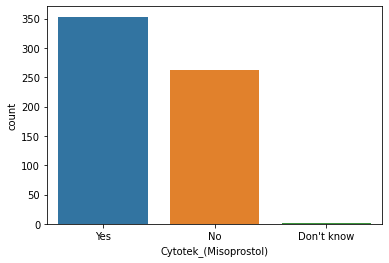

In [ ]:
#Visualization of all abortion methods used
for i in ListHowLost:
    sns.countplot(x=abortion1[i])

Because abortion is illegal in Haiti, women are not well informed about the various methods used to perform an abortion, even if they have already experienced one. The various calculations above confirm this. 

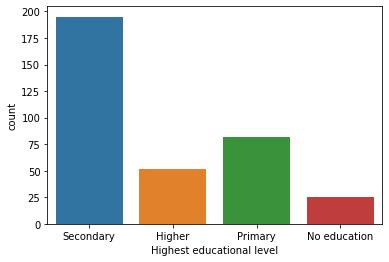

In [ ]:
#
sns.countplot(x=abortion1['Highest educational level'])

### The vast majority of women who have abortions are women whose level of education does not exceed the secondary level, followed by the primary level. 

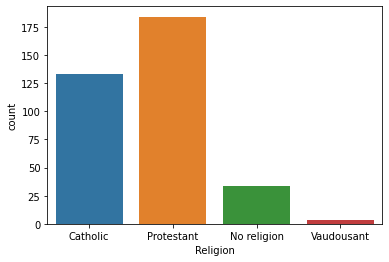

In [ ]:

sns.countplot(x=abortion1['Religion'])

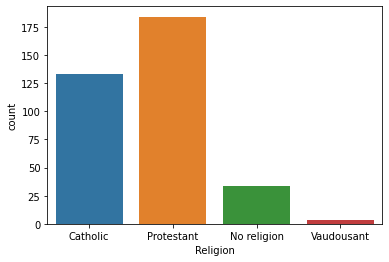

In [ ]:
sns.countplot(x=abortion1["Religion"])

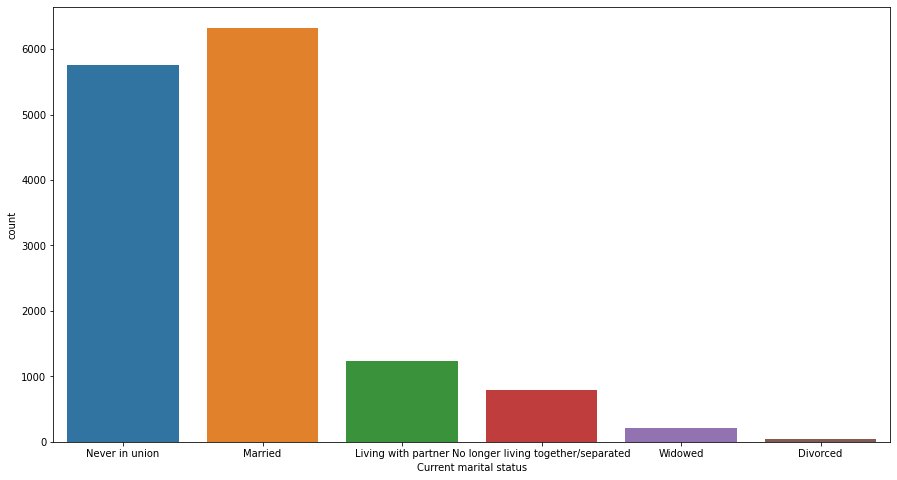

In [ ]:
fig_dims = (15,8)
fig, ax = plot.subplots(figsize=fig_dims)
sns.countplot(x=abortion["Current marital status"],ax=ax, data=abortion1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

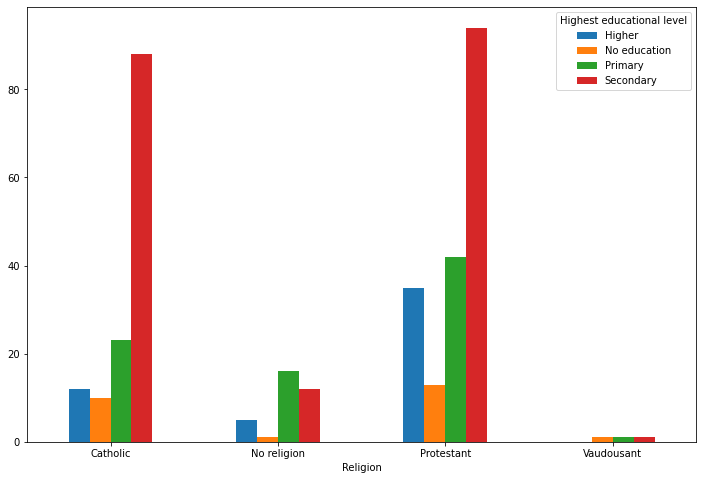

In [ ]:
my_pivot2 =  pd.pivot_table(data=abortion1,index="Highest educational level",columns="Religion",values ="pregnancy_loses",aggfunc="count")
abortion1["Secondary"] =abortion1["Highest educational level"].apply(lambda x: 1 if x == "Secondary" else 0)
abortion1["Primary"] =abortion1["Highest educational level"].apply(lambda x: 1 if x=="Primary" else 0)
abortion1["No education"] =abortion1["Highest educational level"].apply(lambda x: 1 if x=="Mo rducation" else 0)
abortion1["Higher"] =abortion1["Highest educational level"].apply(lambda x: 1 if x=="Higher" else 0)

# Cross tabulation between Religion and educational level
CrosstabResult=pd.crosstab(index=abortion1['Religion'],columns=abortion1['Highest educational level'])
#print(CrosstabResult)
 
# Grouped bar chart between GENDER and communication channel
CrosstabResult.plot.bar(figsize=(12,8), rot=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


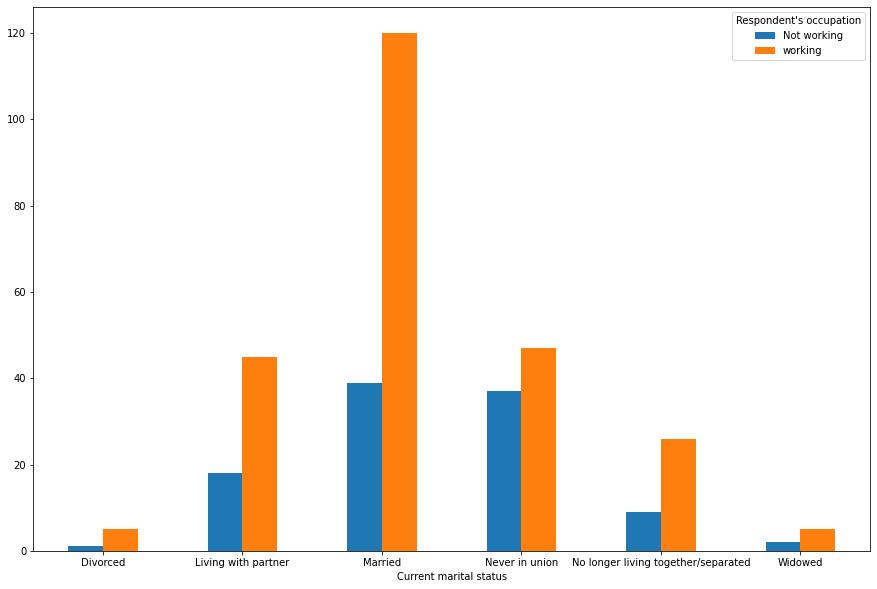

In [ ]:
my_pivot2 =  pd.pivot_table(data=abortion1,index="Respondent's occupation",columns="Current marital status",values ="pregnancy_loses",aggfunc="count")
abortion1["Not working"] =abortion1["Respondent's occupation"].apply(lambda x: 1 if x == "Not working" else 0)
abortion1["working"] =abortion1["Respondent's occupation"].apply(lambda x: 1 if x=="working" else 0)
# Cross tabulation between Current marital status and educational level
CrosstabResult=pd.crosstab(index=abortion1['Current marital status'],columns=abortion1["Respondent's occupation"])
#print(CrosstabResult)
 
# Grouped bar chart between Current marital status and education level 
CrosstabResult.plot.bar(figsize=(15,10), rot=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

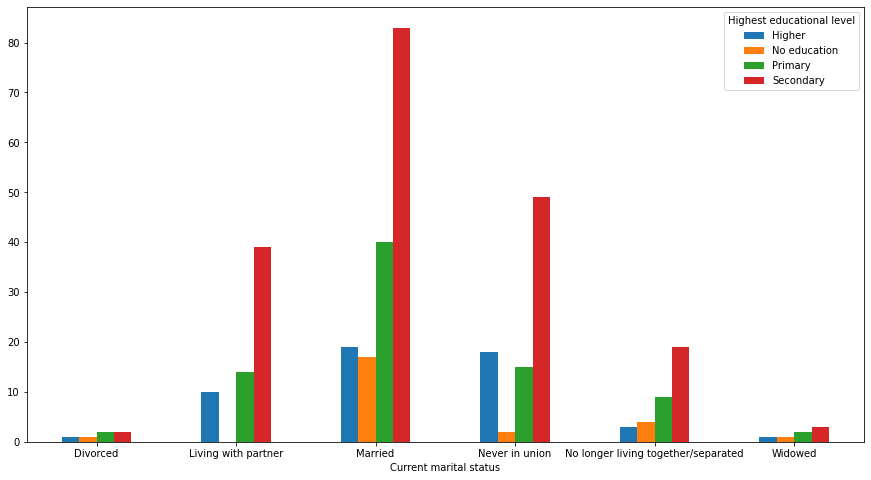

In [ ]:
my_pivot2 =  pd.pivot_table(data=abortion1,index="Highest educational level",columns="Current marital status",values ="pregnancy_loses",aggfunc="count")
abortion1["Secondary"] =abortion1["Highest educational level"].apply(lambda x: 1 if x == "Secondary" else 0)
abortion1["Primary"] =abortion1["Highest educational level"].apply(lambda x: 1 if x=="Primary" else 0)
abortion1["No education"] =abortion1["Highest educational level"].apply(lambda x: 1 if x=="Mo rducation" else 0)
abortion1["Higher"] =abortion1["Highest educational level"].apply(lambda x: 1 if x=="Higher" else 0)

# Cross tabulation between Religion and educational level
CrosstabResult=pd.crosstab(index=abortion1['Current marital status'],columns=abortion1['Highest educational level'])
#print(CrosstabResult)
 
# Grouped bar chart between GENDER and communication channel
CrosstabResult.plot.bar(figsize=(15,8), rot=0)

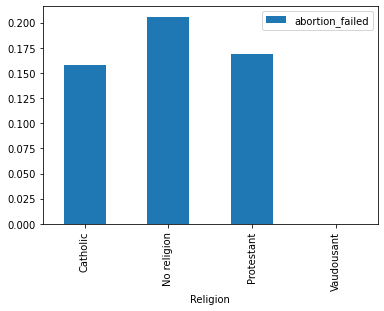

In [ ]:
religion = pd.pivot_table(abortion1,index='Religion', values='abortion_failed').plot.bar()
religion

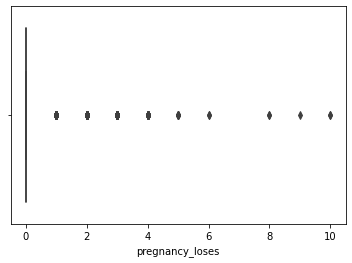

In [ ]:
#Region=pd.pivot_table(abortion1,index='Region', values='abortion_failed')
#Region.plot.bar()
pregnancy_loses = abortion1['pregnancy_loses']
sns.boxplot(x='pregnancy_loses',data=abortion)

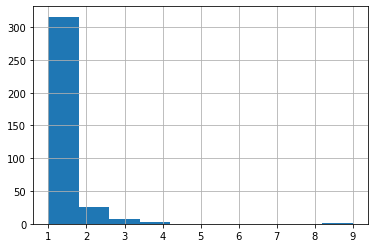

In [ ]:
abortion1['pregnancy_loses'].hist()

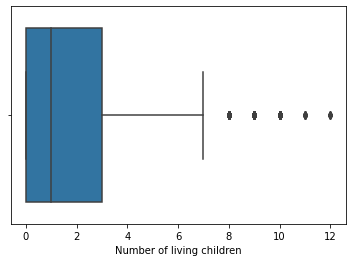

In [ ]:
sns.boxplot(x='Number of living children',data=abortion)

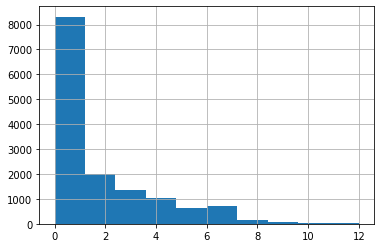

In [ ]:
/abortion1['Number of living children'].hist()

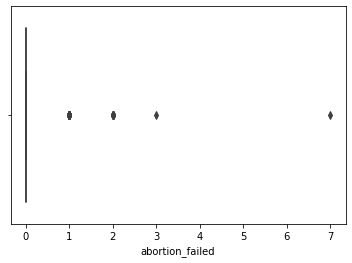

In [ ]:
sns.boxplot(x='abortion_failed',data=abortion1)

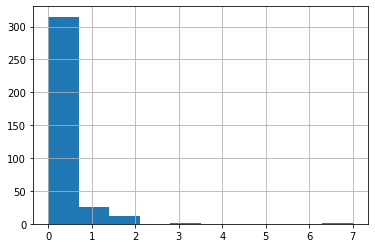

In [ ]:
abortion1['abortion_failed'].hist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

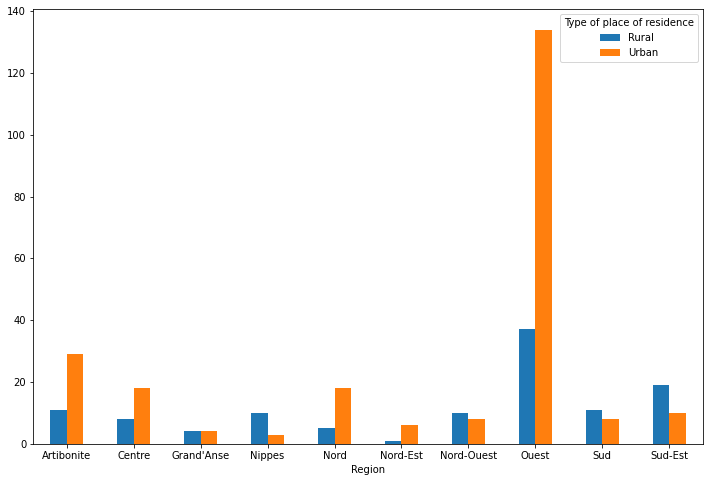

In [ ]:
my_pivot2 =  pd.pivot_table(data=abortion1,index="Region",columns="Type of place of residence",values ="pregnancy_loses",aggfunc="count")
abortion1["Artibonite"] =abortion1["Region"].apply(lambda x: 1 if x == "Artibonite" else 0)
abortion1["Centre"] =abortion1["Region"].apply(lambda x: 1 if x=="Centre" else 0)
abortion1["Grand'Anse"] =abortion1["Region"].apply(lambda x: 1 if x=="Grand'Anse" else 0)
abortion1["Nippes"] =abortion1["Region"].apply(lambda x: 1 if x=="Nippes" else 0)
abortion1["Nord"] =abortion1["Region"].apply(lambda x: 1 if x=="Nord" else 0)
abortion1["Nord-Est"] =abortion1["Region"].apply(lambda x: 1 if x=="Nord-Est" else 0)
abortion1["Nord-Ouest"] =abortion1["Region"].apply(lambda x: 1 if x=="Nord-Ouest" else 0)
abortion1["Ouest"] =abortion1["Region"].apply(lambda x: 1 if x=="Ouest" else 0)
abortion1["Sud"] =abortion1["Region"].apply(lambda x: 1 if x=="Sud" else 0)
abortion1["Sud-Est"] =abortion1["Region"].apply(lambda x: 1 if x=="Sud-Est" else 0)

# Cross tabulation between Region and Type of place of residence
CrosstabResult=pd.crosstab(index=abortion1['Region'],columns=abortion1['Type of place of residence'])
#print(CrosstabResult)
 
# Grouped bar chart between Region and Type of place of residence
CrosstabResult.plot.bar(figsize=(12,8), rot=0)

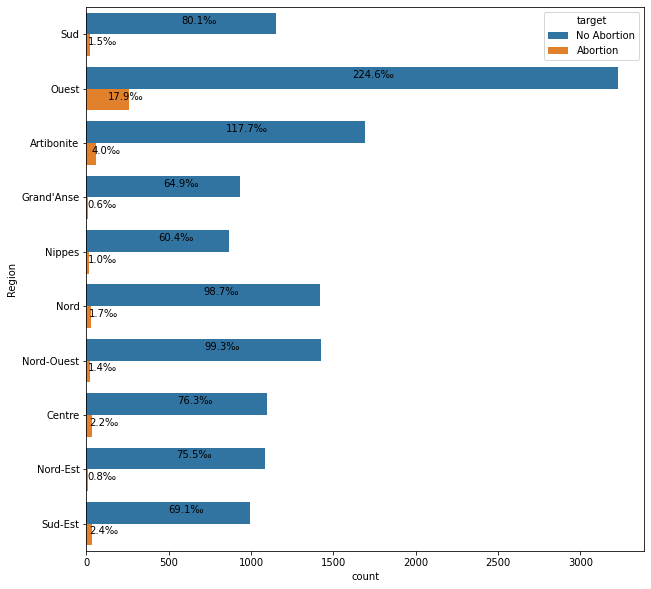

In [ ]:
fig_dims = (10,10)
fig, ax = plot.subplots(figsize=fig_dims)
jx = sns.countplot(y="Region", hue="target",ax=ax, data=abortion)
total = len(abortion["Region"])
for p in ax.patches:
        percentage = '{:.1f}‰'.format(p.get_width()/total*1000)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=10,color="black")

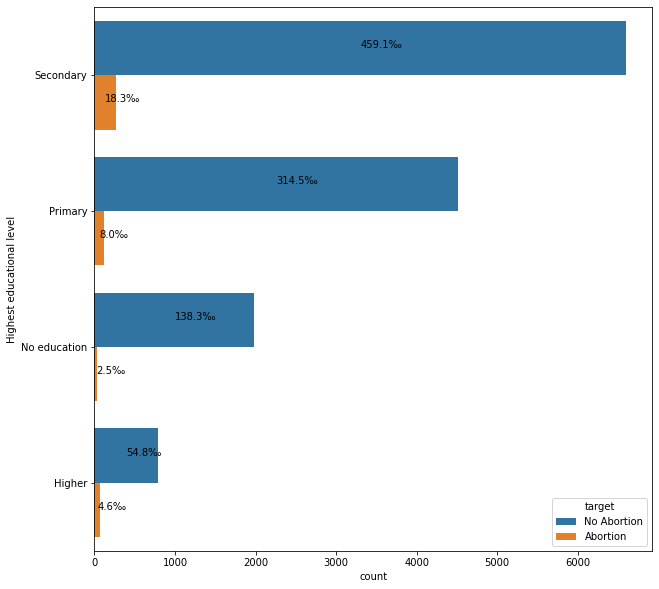

In [ ]:
fig_dims = (10,10)
fig, ax = plot.subplots(figsize=fig_dims)
jx = sns.countplot(y="Highest educational level", hue="target",ax=ax, data=abortion)
total = len(abortion["Highest educational level"])
for p in ax.patches:
        percentage = '{:.1f}‰'.format(1000* p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=10,color="black")

In [ ]:
abortion['Current marital status'].unique()

array(['Never in union', 'Married', 'Living with partner',
       'No longer living together/separated', 'Widowed', 'Divorced'],
      dtype=object)

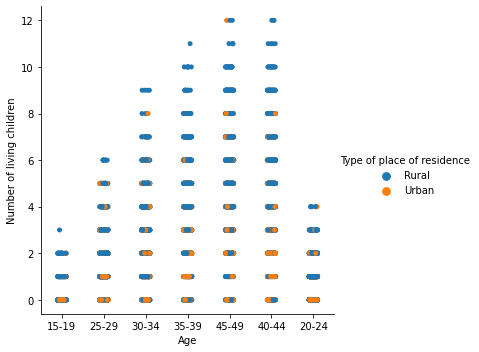

In [ ]:
sns.catplot(x='Age', y='Number of living children', data=abortion, hue='Type of place of residence')

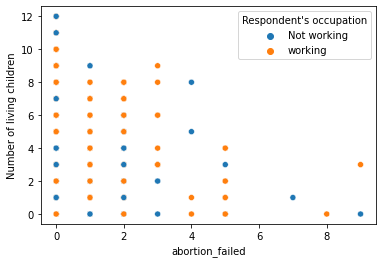

In [ ]:
sns.scatterplot(x='abortion_failed', y='Number of living children', data=abortion, hue="Respondent's occupation")

In [ ]:
#sns.jointplot(x='Age', y='target', data=abortion)

In [ ]:
#sns.heatmap(abortion.corr())


# Hypothesis Test

## The contingency tables between Violence and other Categorical variables
#### Chi-Square test (A Chi-Square test is determined by a significant difference or relationship between two categorical variables from a single population. In general, this test assesses whether distributions of categorical variables differ from each other).The contingency table between Beating and Region Chi-Square test.


### Null Hypothesis H0: The two categorical variables are independent—that is, Beating is independent with Region.

#### Alternative Hypothesis Ha : The two categorical variables are not independent—that is, Beating is not independent with Region,Region,Has an acount in a bank or other institution

In [ ]:
#abortion1 = abortion.set_index('Religion')
#abortion1
abortion["index"]= abortion.index

In [ ]:
# Summarise dataframe using pivot_table: target and Religion.
f3=pd.pivot_table(abortion,values="index", index=['Religion'],columns=['target'], aggfunc="count",fill_value =0)
f3

target,Abortion,No Abortion
Religion,,
Catholic,189,5310
No religion,43,913
Other,0,1
Protestant,239,7523
Vaudousant,9,144


In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f3.values)
print("p-values:",p)
if p <= 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 0.06457713867305921
Hypothesis Accepted


In [ ]:
f4=pd.pivot_table(abortion,values="index", index=['Current marital status'],columns=['target'], aggfunc="count",fill_value =0)
f4

target,Abortion,No Abortion
Current marital status,,
Divorced,7,30
Living with partner,87,1148
Married,222,6106
Never in union,99,5661
No longer living together/separated,55,742
Widowed,10,204


In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f4.values)
print("p-values:",p)
if p <= 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 8.796867613273931e-33
Hypothesis Rejected


In [ ]:
f5=pd.pivot_table(abortion,values="index", index=['Age'],columns=['target'], aggfunc="count",fill_value =0)
f5

target,Abortion,No Abortion
Age,,
15-19,8,3299
20-24,65,2708
25-29,94,2108
30-34,94,1825
35-39,86,1559
40-44,75,1233
45-49,58,1159


In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f5.values)
print("p-values:",p)
if p <= 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 2.176587665478388e-35
Hypothesis Rejected


In [ ]:
f6=pd.pivot_table(abortion,values="index", index=["Respondent's occupation"],columns=['target'], aggfunc="count",fill_value =0)
f6

target,Abortion,No Abortion
Respondent's occupation,,
Not working,128,6234
working,352,7657


In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f6.values)
print("p-values:",p)
if p <= 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 4.13712464848356e-15
Hypothesis Rejected


In [ ]:
f7=pd.pivot_table(abortion,values="index", index=["Highest educational level"],columns=['target'], aggfunc="count",fill_value =0)
f7

target,Abortion,No Abortion
Highest educational level,,
Higher,66,787
No education,36,1987
Primary,115,4519
Secondary,263,6598


In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f7.values)
print("p-values:",p)
if p <= 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 1.0908879985958887e-17
Hypothesis Rejected


In [ ]:
f8=pd.pivot_table(abortion,values="index", index=["Type of place of residence"],columns=['target'], aggfunc="count",fill_value =0)
f8

target,Abortion,No Abortion
Type of place of residence,,
Rural,146,8470
Urban,334,5421


In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f8.values)
print("p-values:",p)
if p <= 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 7.312625739684625e-41
Hypothesis Rejected


In [ ]:
f9=pd.pivot_table(abortion,values="index", index=["Region"],columns=['target'], aggfunc="count",fill_value =0)
f9

target,Abortion,No Abortion
Region,,
Artibonite,57,1691
Centre,31,1097
Grand'Anse,9,932
Nippes,15,868
Nord,25,1419
Nord-Est,11,1085
Nord-Ouest,20,1427
Ouest,257,3228
Sud,21,1151


In [ ]:
# Apply Test
stat, p, dof, expected = chi2_contingency(f9.values)
print("p-values:",p)
if p <= 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")

p-values: 3.5257886102737584e-50
Hypothesis Rejected


In [ ]:
abortion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14371 entries, 0 to 15512
Data columns (total 33 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   pregnancy_loses                                                                   14371 non-null  float64
 1   How many induced abortions during her live                                        14371 non-null  float64
 2   dilatation and curettage                                                          14371 non-null  object 
 3   aspiration                                                                        14371 non-null  object 
 4   sonde                                                                             14371 non-null  object 
 5   Cytotek_(Misoprostol)                                                             14371 non-null  object 
 6 

### Machine Learning


In [ ]:
ABORTION = abortion.drop(["How many induced abortions during her live","index"], axis=1)
#abortion['target'] =abortion['target'].replace({'Abortion':1, 'No Abortion':0})
ABORTION1 = pd.get_dummies(ABORTION, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)
#abortion['dilatation and curettage'] = abortion['dilatation and curettage'].map({"No":0, "Yes":1,"Don't know":2})

In [ ]:
ABORTION1.head()

,pregnancy_loses,abortion_failed,Number of living children,dilatation and curettage_No,dilatation and curettage_Yes,aspiration_No,aspiration_Yes,sonde_No,Cytotek_(Misoprostol)_No,Cytotek_(Misoprostol)_Yes,injections_No,injections_Yes,pill_No,pill_Yes,plants/decoction_No,plants/decoction_Yes,other_No,other_Yes,dont_know_Yes - don't know,Who assisted during this abortion - doctor_Yes,Who assisted during this abortion - nurse_Yes,Who assisted during this abortion - birth attendant/ matrone avec boï¿½te_Yes,Who assisted during this abortion - relatives/ friends_Yes,Who assisted during this abortion - other_Yes,Who assisted during this abortion - nobody_Yes,Age_20-24,Age_25-29,Age_30-34,Age_35-39,Age_40-44,Age_45-49,Highest educational level_No education,Highest educational level_Primary,Highest educational level_Secondary,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Ouest,Region_Sud,Region_Sud-Est,Type of place of residence_Urban,Religion_No religion,Religion_Other,Religion_Protestant,Religion_Vaudousant,Respondent's occupation_working,Current marital status_Living with partner,Current marital status_Married,Current marital status_Never in union,Current marital status_No longer living together/separated,Current marital status_Widowed,target_No Abortion
0,0.0,0.0,0.0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
1,0.0,0.0,0.0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,0.0,0.0,0.0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.0,0.0,1.0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1
4,0.0,0.0,0.0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1


In [ ]:
ABORTION1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14371 entries, 0 to 15512
Data columns (total 55 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   pregnancy_loses                                                                14371 non-null  float64
 1   abortion_failed                                                                14371 non-null  float64
 2   Number of living children                                                      14371 non-null  float64
 3   dilatation and curettage_No                                                    14371 non-null  uint8  
 4   dilatation and curettage_Yes                                                   14371 non-null  uint8  
 5   aspiration_No                                                                  14371 non-null  uint8  
 6   aspiration_Yes        

In [ ]:
!pip install sklearn

### classification model


In [ ]:
#from sklearn.model_selection import model_selection
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
y =  ABORTION1['target_No Abortion']
X = ABORTION1.drop(columns= ['target_No Abortion','pregnancy_loses','abortion_failed'], axis=1)

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

vif_data


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Number of living children,2.722375
1,dilatation and curettage_No,inf
2,dilatation and curettage_Yes,inf
3,aspiration_No,inf
4,aspiration_Yes,inf
5,sonde_No,inf
6,Cytotek_(Misoprostol)_No,inf
7,Cytotek_(Misoprostol)_Yes,inf
8,injections_No,inf
9,injections_Yes,inf


In [ ]:
features_cols = list(vif_data[vif_data.VIF <2]['feature'])
features_cols

["dont_know_Yes - don't know",
 'Who assisted during this abortion - nurse_Yes',
 'Who assisted during this abortion - birth attendant/ matrone avec boï¿½te_Yes',
 'Who assisted during this abortion - other_Yes',
 'Age_20-24',
 'Region_Centre',
 "Region_Grand'Anse",
 'Region_Nippes',
 'Region_Nord',
 'Region_Nord-Est',
 'Region_Nord-Ouest',
 'Region_Sud',
 'Region_Sud-Est',
 'Type of place of residence_Urban',
 'Religion_No religion',
 'Religion_Other',
 'Religion_Protestant',
 'Religion_Vaudousant',
 "Respondent's occupation_working"]

In [ ]:
X = X[features_cols]

In [ ]:
!pip install imblearn


In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y= oversample.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
X_test.shape

(5557, 19)

In [ ]:
y_test.shape

(5557,)

y_test.shape

In [ ]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_train,y_train)
model_LogisticRegression.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7327694799352168

In [ ]:
model_classification = KNeighborsClassifier()
model_classification.fit(X_train,y_train)
model_classification.score(X_test,y_test)

0.7451862515745906

Decision Tree model

In [ ]:
model_decision_tree = DecisionTreeClassifier()

In [ ]:
model_decision_tree.fit(X_train,y_train)
model_decision_tree.score(X_test,y_test)

0.7746985783696239

import time 
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
for model in models:
  start = time.time()
  model.fit(X_train,y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  plot_roc_curve(model,X_test,y_test)
   #msles.append(mean_squared_log_error(y_test,y_pred))

df = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

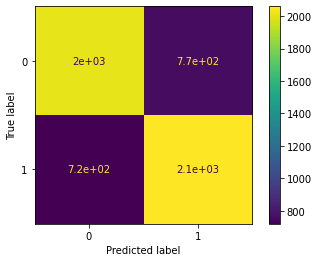

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_LogisticRegression,X_test,y_test)

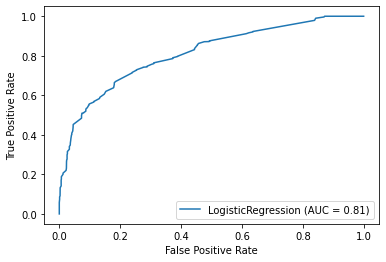

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model_LogisticRegression,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


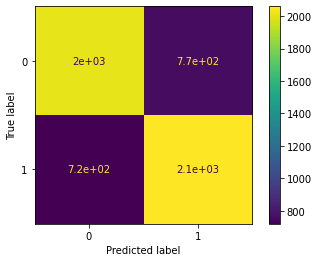

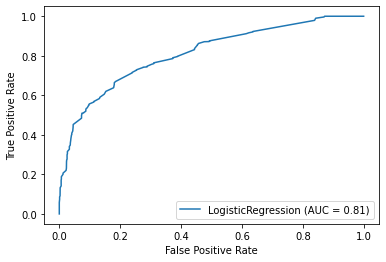

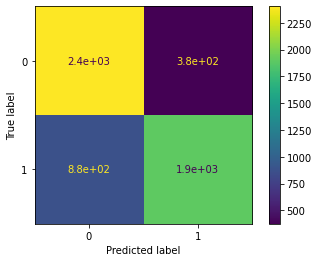

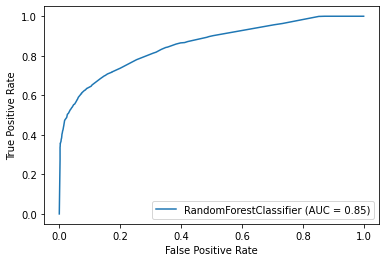

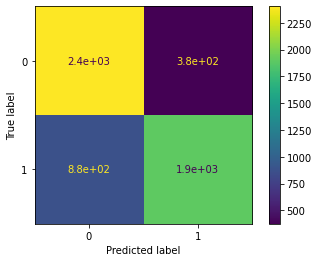

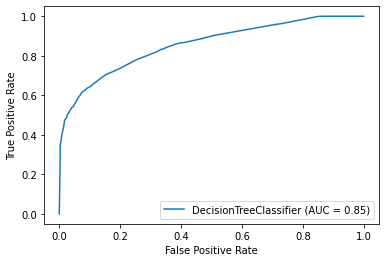

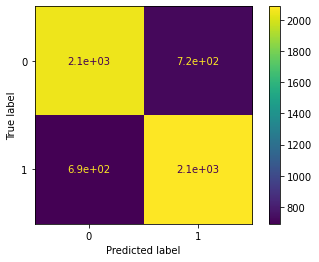

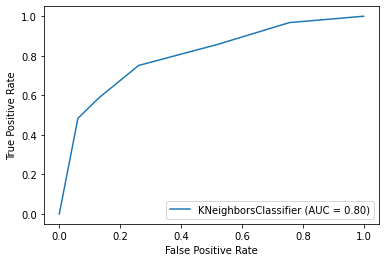

In [ ]:
import time 
times_list = []
scores = []
model_names = ["LogisticRegression","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier"]
models = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]
for model in models:
  start = time.time()
  model.fit(X_train,y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append(model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  plot_roc_curve(model,X_test,y_test)
   #msles.append(mean_squared_log_error(y_test,y_pred))

df = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [ ]:
df

,names,scores,times
0,LogisticRegression,0.732769,0.399416
1,RandomForestClassifier,0.774699,0.923496
2,DecisionTreeClassifier,0.774699,0.022810
3,KNeighborsClassifier,0.745186,0.755140
